#### Optimal Salary Problem

Let's say we have to pick between 2 different job offers. The first job offer has a base weekly salary of 1000 dollars and pays 30 dollars an hour. We can represent this offer as y = 1000 + 30x where y represents  dollars earned that week and x represents hours worked that week. The second job offer has a base weekly salary of 100 dollars and pays 50 dollars an hour. We can represent this offer as y = 100 + 50x, where y  also represents dollars earned that week and x also represents hours worked that week.

We want to understand which job offer is better. If we know exactly the amount of money we'd like to make each week (y), we can substitute that value into both equations and solve for x to identify which job will require us to work less hours. If we know exactly the number of hours we want to work each week (x), we can substitute that value into both equations and solve for y  to identify which job will make us more money for the same amount of hours worked.

Instead, if we want to understand:

At what number of hours worked can we expect to make the same amount of money at either job?
How many hours do we have to work to make more money at the first job than the second job?
To answer the first question, we need to find the x value where both the y values are equivalent. Once we know where they intersect, we can easily find out the answer to the second question.

### Instructions
Use numpy.linspace() to generate 1000, evenly spaced values between 0 and 50 and assign to x.

Transform x using the equation y=30x+1000 and assign the result to y1.

Transform x using the equation y = 50x + 100 and assign the result to y2.

Generate 2 line plots on the same subplot:
1. One with x on the x-axis and y1 on the y-axis. Set the line color to "orange".
2. One with x on the x-axis and y2 on the y-axis. Set the line color to "blue".

Skip selecting a value range for the x and y axes, and instead let matplotlib automatically select based on the data.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
x = np.linspace(0,50,num = 1000) 
y1 = 30*x + 1000
y2 = 50*x + 100

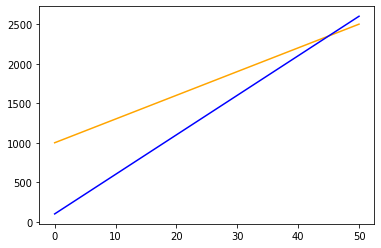

In [4]:
plt.plot(x, y1, c = 'orange') 
plt.plot(x, y2, c = 'blue') 
plt.show() 

From the plot we generated we can tell that both functions intersect at somewhere near the point (45,2200).

This point where both equations intersect is known as a solution to the system, because substituting for x  and y  into both functions in the system makes both of them true. Said another way, plugging in the x value of the solution into both functions yields the same y value.

Let's explore how to solve this system by hand. 

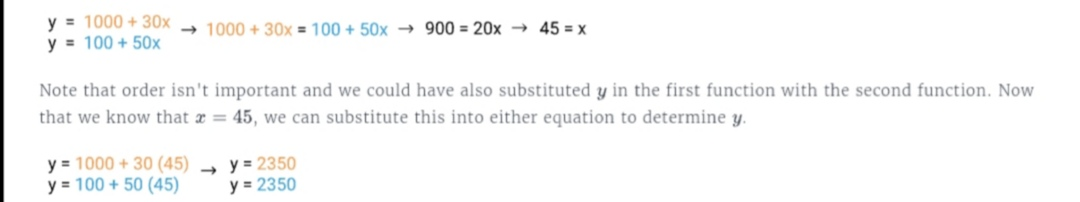

The solution to our system is (45,2350) . This means that if we work exactly 45 hours a week, we'll make the same amount of money at either job 2350: .

### Representing Functions In General Form

Linear algebra provides a way to represent a linear system compactly, known as a matrix, and a set of rules for manipulating that representation, also known as an algebra.

A matrix uses rows and columns to represent only the coefficients in a linear system and it's similar to the way data is represented in a spreadsheet or a dataframe. Before we can represent our system in a matrix, we need to rearrange each of our functions into the general form.


we primarily explored linear functions in slope-intercept form:

y = mx + b

In linear algebra, we usually represent linear functions in the general form:

Ax + By = c

In the general form, the variables and their coefficients are on the left side, while the constant term is on the right side. We can switch from point-slope form to the general form by rearranging the terms:

mx - y = - b

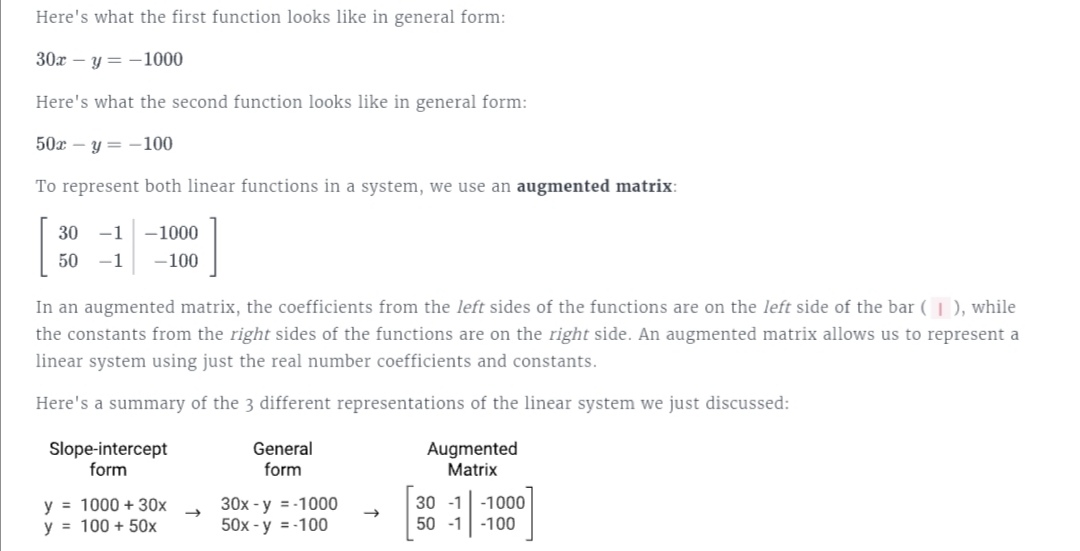

#### Representing An Augmented Matrix In NumPy

To represent an augmented matrix, we can use the numpy.asarray() function and pass in each row as a list, from the top row to the bottom row. 

In [6]:
matrix_one = np.asarray([
    [30, -1, -1000],
    [50, -1, -100]  
], dtype=np.float32)

In [7]:
matrix_one 

array([[   30.,    -1., -1000.],
       [   50.,    -1.,  -100.]], dtype=float32)

### Matrix Representation Of The Solution

The important question now is, how do we arrive at the same solution we did earlier in the mission by arithmetic? Earlier in the mission, we used arithmetic to calculate the solution to the system and represented it as a coordinate pair: (45,2350). Here's how we represent the solution when we're working with the matrix representation:

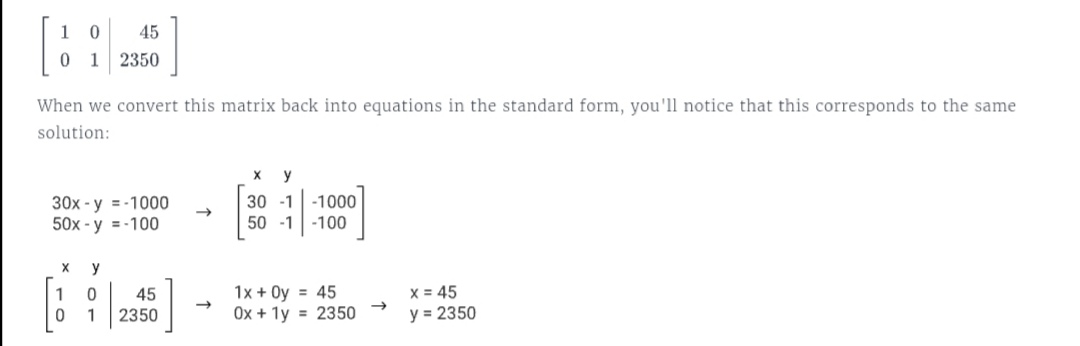

### Row Operations

To preserve the relationships in the linear system, we can only use the following row operations:

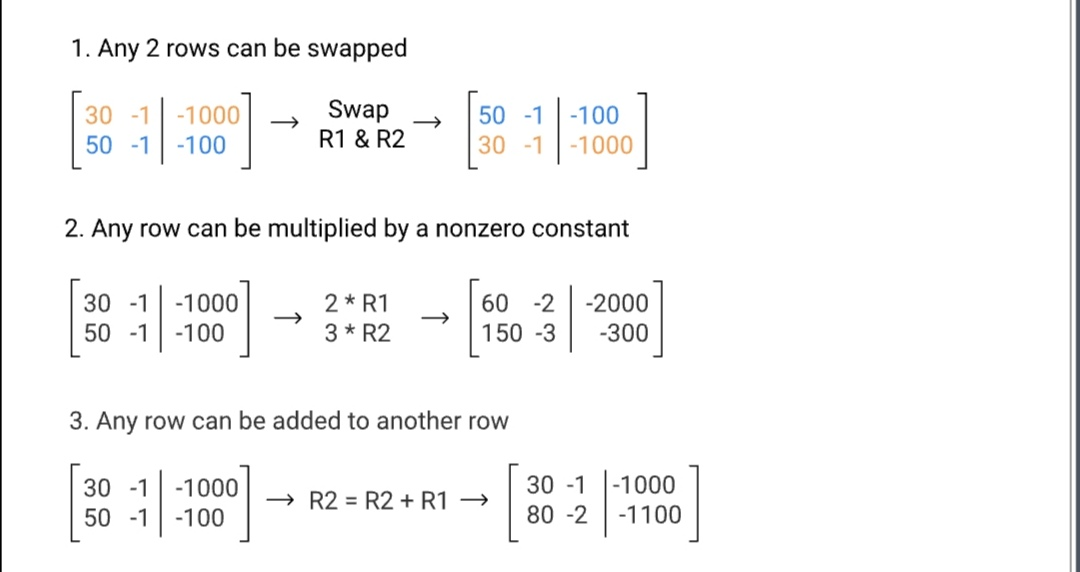

While these may seem new, these row operations are the same allowed operations we can perform when the functions are in equation form. Before we dive into how to solve our linear system using these row operations, let's practice performing these transformations in NumPy.

To swap 2 rows in a NumPy ndarray object, we need to use double bracket notation to specify the row ordering change:

In [3]:
matrix =  np.asarray([
    [1, 3],
    [50, 2]  
], dtype=np.float32)
# Swap the second row (at index value 1) with the first row (at index value 0).
matrix = matrix[[1,0]]

In [4]:
matrix

array([[50.,  2.],
       [ 1.,  3.]], dtype=float32)

To multiply a row by a nonzero constant, we select the row, use the * operator to multiply all of the values by a scalar value, and then assign the transformed row back:

In [5]:
matrix[1] = 2*matrix[1] 
matrix 

array([[50.,  2.],
       [ 2.,  6.]], dtype=float32)

To add one row to another row, we need to add both rows then assign it back to the row we want to overwrite:

In [6]:
matrix[1] = matrix[0] + matrix[1]
matrix 

array([[50.,  2.],
       [52.,  8.]], dtype=float32)

Lastly, we can combine and chain these rules to perform more complex row transformations:

### Instructions. 

Divide the first row from matrix_one by 30.

In [8]:
matrix_one = np.asarray([
    [30, -1, -500],
    [50, -1, -100]  
], dtype=np.float32)
matrix_one[0]= matrix_one[0] / 30
matrix_one 

array([[ 1.0000000e+00, -3.3333335e-02, -1.6666666e+01],
       [ 5.0000000e+01, -1.0000000e+00, -1.0000000e+02]], dtype=float32)

### Simplifying Matrix To Echelon Form

To find the solutions of a matrix, there are 2 main steps we need to take. The first step is to rearrange the matrix into echelon form. In this form, the values on the diagonal locations are all equal to 1 and the values below the diagonal are all equal to 0.



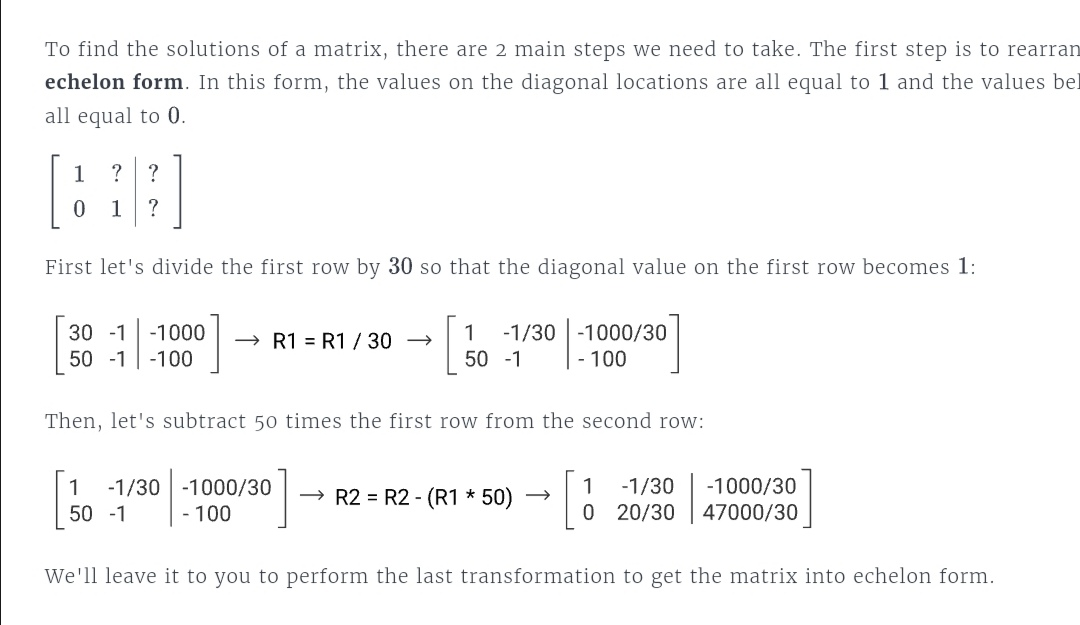

In [13]:
matrix_on = np.asarray([[30,-1,-1000],
                        [50,-1,-100]], dtype=np.float32) 
matrix_on[0] = matrix_on[0]/30
matrix_on[1]= matrix_on[1]-(matrix_on[0]*50)
matrix_on
    

array([[ 1.0000000e+00, -3.3333335e-02, -3.3333332e+01],
       [ 0.0000000e+00,  6.6666675e-01,  1.5666666e+03]], dtype=float32)

### Row Reduced Echelon Form

The second step is to rearrange the matrix into row reduced echelon form.

In [15]:
matrix_on[1] = matrix_on[1]*(30/20)

In [16]:
matrix_on

array([[ 1.0000000e+00, -3.3333335e-02, -3.3333332e+01],
       [ 0.0000000e+00,  1.0000001e+00,  2.3500000e+03]], dtype=float32)

### Instructions

Transform matrix_three into echelon form and display using the print() function

In [30]:
matrix_three = np.asarray([
    [1, -1/30, -1000/30],
    [0, 1, 2350]  
], dtype=np.float32)

In [31]:
x = matrix_three[1]/30
matrix_three[0] = matrix_three[0] + x
matrix_three 

array([[1.0000000e+00, 0.0000000e+00, 4.5000004e+01],
       [0.0000000e+00, 1.0000000e+00, 2.3500000e+03]], dtype=float32)